HW6 Part 2



In [1]:
#!unzip data.zip

Archive:  data.zip
  inflating: aps_failure_test_set.csv  
  inflating: aps_failure_training_set.csv  


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import math
from sklearn import linear_model

In [3]:
data_folder_path="../data/"
#data_folder_path=""
training_file = data_folder_path+"aps_failure_training_set.csv"
testing_file = data_folder_path+"aps_failure_test_set.csv"
training_data =  pd.read_csv(training_file, skiprows = 20,  na_values="na")
testing_data =  pd.read_csv(testing_file, skiprows = 20,  na_values="na")

In [4]:
data = pd.concat([training_data, testing_data])

In [5]:
col_names = list(data.columns)
col_names.remove("class")
print(col_names)
print(len(col_names))

['aa_000', 'ab_000', 'ac_000', 'ad_000', 'ae_000', 'af_000', 'ag_000', 'ag_001', 'ag_002', 'ag_003', 'ag_004', 'ag_005', 'ag_006', 'ag_007', 'ag_008', 'ag_009', 'ah_000', 'ai_000', 'aj_000', 'ak_000', 'al_000', 'am_0', 'an_000', 'ao_000', 'ap_000', 'aq_000', 'ar_000', 'as_000', 'at_000', 'au_000', 'av_000', 'ax_000', 'ay_000', 'ay_001', 'ay_002', 'ay_003', 'ay_004', 'ay_005', 'ay_006', 'ay_007', 'ay_008', 'ay_009', 'az_000', 'az_001', 'az_002', 'az_003', 'az_004', 'az_005', 'az_006', 'az_007', 'az_008', 'az_009', 'ba_000', 'ba_001', 'ba_002', 'ba_003', 'ba_004', 'ba_005', 'ba_006', 'ba_007', 'ba_008', 'ba_009', 'bb_000', 'bc_000', 'bd_000', 'be_000', 'bf_000', 'bg_000', 'bh_000', 'bi_000', 'bj_000', 'bk_000', 'bl_000', 'bm_000', 'bn_000', 'bo_000', 'bp_000', 'bq_000', 'br_000', 'bs_000', 'bt_000', 'bu_000', 'bv_000', 'bx_000', 'by_000', 'bz_000', 'ca_000', 'cb_000', 'cc_000', 'cd_000', 'ce_000', 'cf_000', 'cg_000', 'ch_000', 'ci_000', 'cj_000', 'ck_000', 'cl_000', 'cm_000', 'cn_000', '

In [6]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='median')
imputer.fit(data[col_names])
data[col_names] = imputer.transform(data[col_names])
print(data)

      class   aa_000  ab_000        ac_000  ad_000  ae_000  af_000  ag_000  \
0       neg  76698.0     0.0  2.130706e+09   280.0     0.0     0.0     0.0   
1       neg  33058.0     0.0  0.000000e+00   128.0     0.0     0.0     0.0   
2       neg  41040.0     0.0  2.280000e+02   100.0     0.0     0.0     0.0   
3       neg     12.0     0.0  7.000000e+01    66.0     0.0    10.0     0.0   
4       neg  60874.0     0.0  1.368000e+03   458.0     0.0     0.0     0.0   
...     ...      ...     ...           ...     ...     ...     ...     ...   
15995   neg  81852.0     0.0  2.130706e+09   892.0     0.0     0.0     0.0   
15996   neg     18.0     0.0  5.200000e+01    46.0     8.0    26.0     0.0   
15997   neg  79636.0     0.0  1.670000e+03  1518.0     0.0     0.0     0.0   
15998   neg    110.0     0.0  3.600000e+01    32.0     0.0     0.0     0.0   
15999   neg      8.0     0.0  6.000000e+00     4.0     2.0     2.0     0.0   

       ag_001  ag_002  ...     ee_002    ee_003    ee_004    ee

In [7]:
training_data = data[:60000]
testing_data =  data[60000:]

In [8]:
print(training_data)
print(testing_data)

      class    aa_000  ab_000        ac_000  ad_000  ae_000  af_000  ag_000  \
0       neg   76698.0     0.0  2.130706e+09   280.0     0.0     0.0     0.0   
1       neg   33058.0     0.0  0.000000e+00   128.0     0.0     0.0     0.0   
2       neg   41040.0     0.0  2.280000e+02   100.0     0.0     0.0     0.0   
3       neg      12.0     0.0  7.000000e+01    66.0     0.0    10.0     0.0   
4       neg   60874.0     0.0  1.368000e+03   458.0     0.0     0.0     0.0   
...     ...       ...     ...           ...     ...     ...     ...     ...   
59995   neg  153002.0     0.0  6.640000e+02   186.0     0.0     0.0     0.0   
59996   neg    2286.0     0.0  2.130707e+09   224.0     0.0     0.0     0.0   
59997   neg     112.0     0.0  2.130706e+09    18.0     0.0     0.0     0.0   
59998   neg   80292.0     0.0  2.130706e+09   494.0     0.0     0.0     0.0   
59999   neg   40222.0     0.0  6.980000e+02   628.0     0.0     0.0     0.0   

       ag_001  ag_002  ...     ee_002    ee_003    

In [9]:
print("\n\nTotal data - \n", data["class"].value_counts(),
"\n\nTraining data - \n", training_data["class"].value_counts(),
"\n\nTesting data - \n", testing_data["class"].value_counts())



Total data - 
 neg    74625
pos     1375
Name: class, dtype: int64 

Training data - 
 neg    59000
pos     1000
Name: class, dtype: int64 

Testing data - 
 neg    15625
pos      375
Name: class, dtype: int64


(f) Use SMOTE (Synthetic Minority Over-sampling Technique) to pre-process your
data to compensate for class imbalance.4 Train XGBosst with L1-penalized logistic regression at each node using the pre-processed data and repeat 1e. Do not
forget that there is a right and a wrong way of cross validation here. Compare
the uncompensated case with SMOTE case.

In [10]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
print(training_data["class"].value_counts())
x_train_sm, y_train_sm = smote.fit_resample(training_data[col_names], training_data["class"])
train_sm=pd.DataFrame(x_train_sm, columns= col_names)
train_sm["class"] = y_train_sm 
print(train_sm["class"].value_counts())

neg    59000
pos     1000
Name: class, dtype: int64
neg    59000
pos    59000
Name: class, dtype: int64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  


In [16]:
from sklearn.model_selection import RepeatedKFold, StratifiedKFold, GridSearchCV
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
import xgboost  
cv_scores={}
alphasl = [10 ** i for i in range(-5, 6)]
d = {'pos': 0, 'neg': 1}
train_01 = training_data["class"].map(d)
test_01 = testing_data["class"].map(d)
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from sklearn.metrics import roc_curve
from sklearn.metrics import f1_score, confusion_matrix, roc_curve, roc_auc_score
label = ["pos","neg"]
#gridSearchCV = GridSearchCV(estimator = xgb_model,param_grid=param, cv=cross_validator, n_jobs = 10 , scoring='roc_auc') 
#gridSearchCV.fit(training_data[col_names], train_01)
#print(gridSearchCV.best_estimator_)
#prediction = gridSearchCV.predict(testing_data[col_names])

In [12]:
from imblearn.pipeline import Pipeline as imbpipeline
from imblearn.pipeline import make_pipeline
n_folds = 5
param = {'classifier__C': [ 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100, 1000, 10000]}

pipeline = imbpipeline(steps = [['smote', SMOTE(random_state=11)],
                                ['classifier', xgboost.XGBClassifier(objective='binary:logistic')]
                                ])
smote = SMOTE(random_state=0)
smp_pipeline = make_pipeline(smote, xgboost.XGBClassifier(objective='binary:logistic'))
cross_validator = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=69)
test_01 = testing_data["class"].map(d)
gridSearchCV = GridSearchCV(estimator = pipeline,param_grid=param, cv=cross_validator, n_jobs = 10 , scoring='roc_auc') 
gridSearchCV.fit(training_data[col_names], train_01)

cv_score = gridSearchCV.best_score_

prediction_y = gridSearchCV.predict(testing_data[col_names])
mse = mean_squared_error(test_01, prediction_y)

test_score = gridSearchCV.score(testing_data[col_names], test_01)

/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:703: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


In [18]:
print(test_score, )
print(gridSearchCV.best_estimator_)

0.993009408
Pipeline(steps=[('smote', SMOTE(random_state=11)),
                ['classifier', XGBClassifier(C=0.0001)]])


0.993009408
Pipeline(steps=[('smote', SMOTE(random_state=11)),
                ['classifier', XGBClassifier(C=0.0001)]])


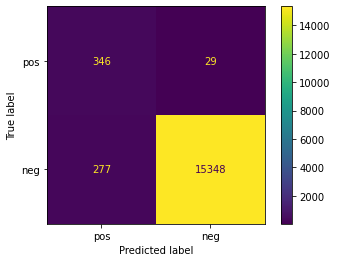

In [19]:
model= gridSearchCV.best_estimator_
prediction_y = gridSearchCV.predict(testing_data[col_names])
test_score = gridSearchCV.score(testing_data[col_names], test_01)
print(test_score, )
print(gridSearchCV.best_estimator_)
cm = confusion_matrix(test_01, prediction_y, labels = [0,1])
cmd = ConfusionMatrixDisplay(cm, display_labels=label)
cmd.plot()

AUC = 0.9939641949152542


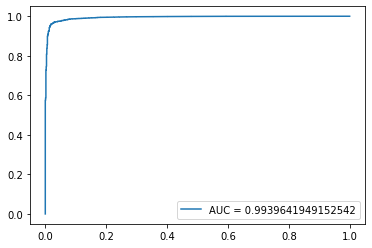

In [20]:
import matplotlib.pyplot as plt
prediction_probab = model.predict_proba(training_data[col_names])[::,1]
fpr, tpr, limit = roc_curve(train_01, prediction_probab)
auc_score= roc_auc_score(train_01, prediction_probab)
print("AUC = "+str(auc_score))
plt.plot(fpr,tpr,label="AUC = "+str(auc_score))
plt.ylabel=("TPR")
plt.xlabel=("FPR")
plt.legend()
plt.show()

We can see that the number of "pos" predictions have increased overall because the training data has balanced class observations. 
The accuracy is very slightly changed.
Accuracy is better than random forest and weighted random forests

2. ISLR 6.6.3

(a) As s increases, the range for beta values become greater, this leads to decrease in RSS. SO RSS will steadily decrease
(b) test RSS, decreases initially and then starts to increase in U shape
(c) variance will steadily increase
(d) bias will steadily reduce
(e) irreducible error remains constant, cant be controlled


3. ISLR, 6.6.5
 
 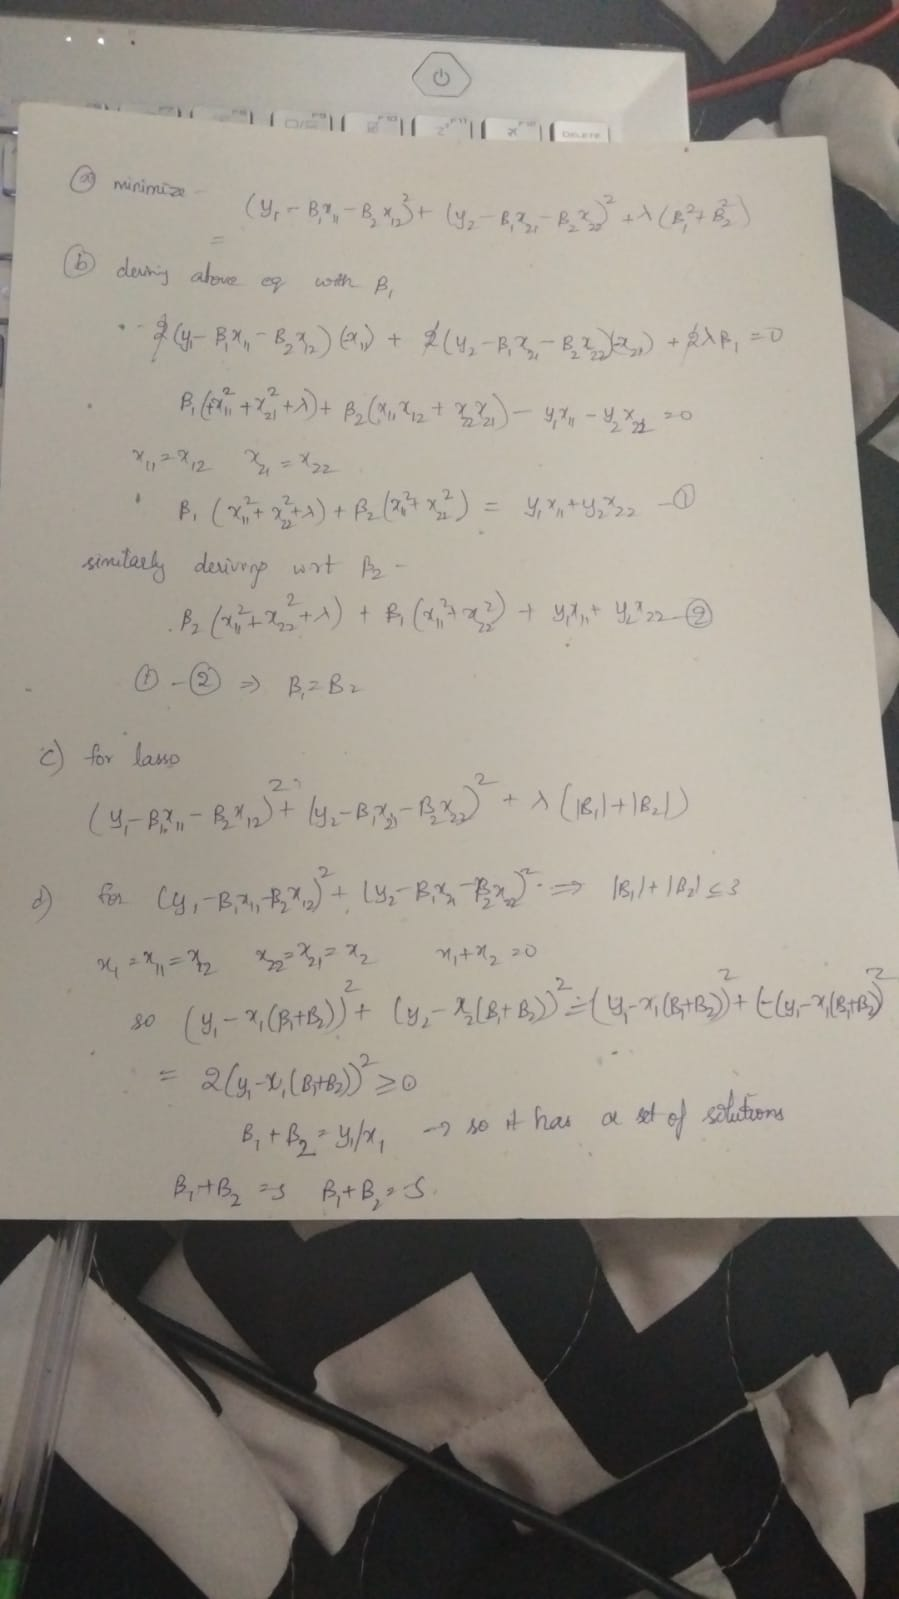

4. ISLR 8.4.5

probabilitites - 0.1, 0.15, 0.2, 0.2, 0.55, 0.6, 0.6, 0.65, 0.7, and 0.75

by majority vote approach, there are 4 samples with probability less than 0.5 and 6 samples more than 0.5, since more sample are in P(X)>0.5, X will be classified as Red

by average probability approach , sum of probabilities = 4.5, mean = 0.45, so X will be classified as not red, i.e green

5. ISLR 9.7.3

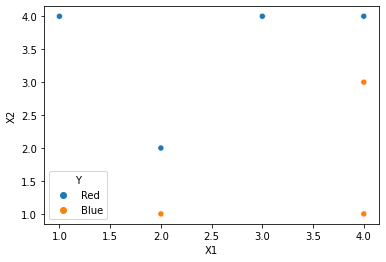

In [25]:
df = pd.DataFrame([[3,4,"Red"],
                   [2,2,"Red"],
                   [4,4,"Red"],
                   [1,4,"Red"],
                   [2,1,"Blue"],
                   [4,3,"Blue"],
                   [4,1,"Blue"]], columns= ["X1", "X2", "Y"])
sns.scatterplot(data=df, x="X1", y="X2", hue="Y")

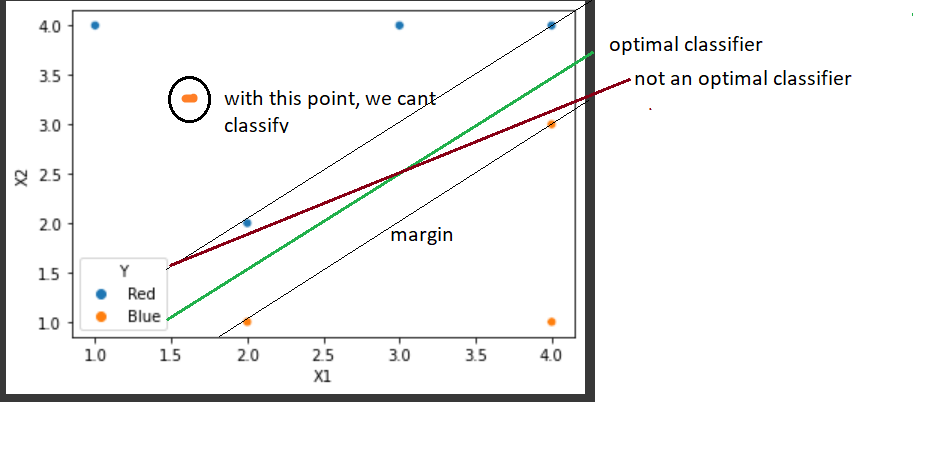

Equation will be -midway of margin lines x2-x1=0 and x2-x1=1 => x2-x1 = 0.5

if(X1-X2-0.5<0), point is blue else red 

7th observation is far from hyperplane so, changing it slightly will not impact the accuracy of the hyperplane 